In [1]:
pip install num2words

     |████████████████████████████████| 102kB 4.6MB/s 


In [2]:
pip install emoji

     |████████████████████████████████| 51kB 3.5MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42175 sha256=e37e884c772117f6222082f943030003b0d62b017fa1186a7781b167d900eb49
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
#Importing necessary libraries

from IPython import display
import math
import string
from pprint import pprint
from num2words import num2words
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [4]:
pip install praw

     |████████████████████████████████| 133kB 9.3MB/s 
     |████████████████████████████████| 204kB 38.8MB/s 


In [0]:
#client id- StmWjOzTODd8Og
#user agent- r/webscraper
#secret- 3-HWmn6SD7a32SEoOLXyVSUv5jQ

import praw
reddit = praw.Reddit(client_id='StmWjOzTODd8Og', client_secret='3-HWmn6SD7a32SEoOLXyVSUv5jQ', user_agent='r/webscraper')

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [50]:
#Storing the titles of extracted posts into a set to avoid repetition

posts = set()

for post in reddit.subreddit('freefolk').hot(limit=500):
  posts.add(post.title)

print(posts)
print(len(posts))

data_posts = pd.DataFrame.from_records(results)
data_posts.to_csv('hottest_500_freefolk.csv', mode='a', encoding='utf-8', index=False)

{'How I feel about ANY prequel series.', 'Emilia Clarke‘s Pumpkin Carving', 'Bobby-b and the boys waiting for the new series', 'When enough time has passed and you miss the joy of watching GOT, but then you remember that nothing in the first seven seasons matters in the slightest', 'Reducing the fantasy elements in ASOIAF', 'Time to petition Netflix to Fire D&D as well?', 'A little GoT/Halloween illustration I did for my local gaming shop. Happy Halloween!', '"The Reigns Of Dan and Dave" (sung to the tune of you know what...)', 'Me going back to being a toxic GoT fan now that HBO is developing a Targaryen show', '2D saying they held back on the lore of WW for the prequel only to for the prequel to be canceled which makes s8 infinitely worse.', 'Emilia Clarke on "House of the Dragon"', 'Now all we need is HBO to announce they’re remaking Season 8 with competent writers and the trinity of good luck will be complete.', 'My parents went to a GOT themed Halloween party. Best outfit went to 

In [36]:
#Brute sentiment analysis without preprocessing and cleaning of extracted data

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for post in posts:
  score = sia.polarity_scores(post)
  score['post'] = post
  results.append(score)
  
pprint(results[:5], width=100)

[{'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'post': 'How I feel about ANY prequel series.'},
 {'compound': 0.3818,
  'neg': 0.0,
  'neu': 0.536,
  'pos': 0.464,
  'post': 'credit twitter user @rodeoman'},
 {'compound': -0.4767, 'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'post': 'Shame'},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'post': 'Emilia Clarke‘s Pumpkin Carving'},
 {'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'post': 'Bobby-b and the boys waiting for the new series'}]


In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
#Stopword removal, punctuation elimination and tokenization of extracted data

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

remove = set(stopwords.words('english'))
filtered = []

for post in posts:
  #Converting numbers to words, translation of emojis and removing punctuations to give bag of words
  post = [num2words(x) if x.isnumeric() else emoji.demojize(x, delimiters=('!', '!')) for x in post.translate(str.maketrans('', '', string.punctuation)).lower().split()]
  
  #Removing stopwords and words irrelevant to sentiment
  temp = [x for x in post if x not in remove]
  filtered.append(" ".join(temp).replace('spoilers', '').strip())

In [39]:
#Results of sentiment analysis after preprocessing

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for post in filtered:
  score = sia.polarity_scores(post)
  score['post'] = post
  results.append(score)
  
pprint(results[:5], width=100)
data = pd.DataFrame.from_records(results)
data.head()

[{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'post': 'feel prequel series'},
 {'compound': 0.3818,
  'neg': 0.0,
  'neu': 0.536,
  'pos': 0.464,
  'post': 'credit twitter user rodeoman'},
 {'compound': -0.4767, 'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'post': 'shame'},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'post': 'emilia clarke‘s pumpkin carving'},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'post': 'bobbyb boys waiting new series'}]


,neg,neu,pos,compound,post
0,0.0,1.000,0.000,0.0000,feel prequel series
1,0.0,0.536,0.464,0.3818,credit twitter user rodeoman
2,1.0,0.000,0.000,-0.4767,shame
3,0.0,1.000,0.000,0.0000,emilia clarke‘s pumpkin carving
4,0.0,1.000,0.000,0.0000,bobbyb boys waiting new series


In [40]:
#Labelling the sentiments depending on a compound threshold of 0.2(can be adjusted)
data['label'] = 0
data.loc[data['compound'] > 0.2, 'label'] = 1
data.loc[data['compound'] < -0.2, 'label'] = -1
data[:10]

,neg,neu,pos,compound,post,label
0,0.000,1.000,0.000,0.0000,feel prequel series,0
1,0.000,0.536,0.464,0.3818,credit twitter user rodeoman,1
2,1.000,0.000,0.000,-0.4767,shame,-1
3,0.000,1.000,0.000,0.0000,emilia clarke‘s pumpkin carving,0
4,0.000,1.000,0.000,0.0000,bobbyb boys waiting new series,0
5,0.159,0.841,0.000,-0.5574,psa dd chose star wars way around kathleen ken...,-1
6,0.091,0.629,0.280,0.5106,enough time passed miss joy watching got remem...,1
7,0.000,1.000,0.000,0.0000,reducing fantasy elements asoiaf,0
8,0.282,0.471,0.247,-0.0772,time petition netflix fire dd well,0
9,0.000,0.654,0.346,0.5719,little gothalloween illustration local gaming ...,1


In [41]:
#Saving the post label data to CSV
label_data = data[['post', 'label']]
label_data.to_csv('reddit_posts_labels.csv', mode='a', encoding='utf-8', index=False)

#Sample posts from positive and negative label categories
print('Positive posts-')
pprint(list(data[data['label'] == 1].post)[:5], width=150)
print('Negative posts-')
pprint(list(data[data['label'] == -1].post)[:5], width=150)

Positive posts-
['credit twitter user rodeoman',
 'enough time passed miss joy watching got remember nothing first seven seasons matters slightest',
 'little gothalloween illustration local gaming shop happy halloween',
 'guess well wait got reboot twenty years ever want see ice spiders screen!spider!!spider_web!!snowflake!',
 'going back toxic got fan hbo developing targaryen show']
Negative posts-
['shame',
 'psa dd chose star wars way around kathleen kennedy extended open invitation return currently working two hundred million netflix series',
 '2d saying held back lore ww prequel prequel canceled makes s8 infinitely worse',
 'i’m angry',
 'constant struggle']


In [42]:
#Calculating number and percentage of posts belonging to any of the sentiments
print(data.label.value_counts())
print(data.label.value_counts(normalize=True) * 100)

 0    432
-1    323
 1    225
Name: label, dtype: int64
 0    44.081633
-1    32.959184
 1    22.959184
Name: label, dtype: float64


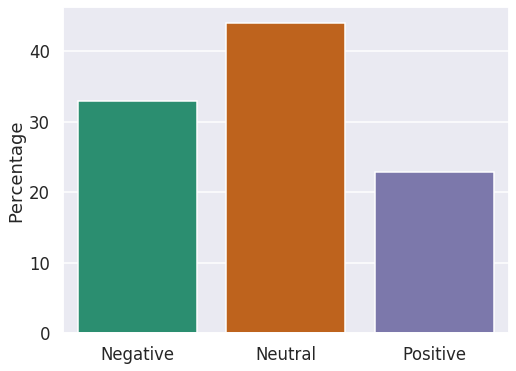

In [47]:
#Plotting a bar graph of the posts according to their sentiments

fig, ax = plt.subplots(figsize=(8, 6))
counts = data.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')
plt.show()

In [44]:
#Displaying the most common words used in posts exhibiting positive or negative sentiments

tokenizer = RegexpTokenizer(r'\w+')
positive_posts = list(data[data.label == 1].post)
positive_tokenized = []
for x in positive_posts:
  positive_tokenized.extend(tokenizer.tokenize(x))
positive_freq = nltk.FreqDist(positive_tokenized)

negative_posts = list(data[data.label == -1].post)
negative_tokenized = []
for x in negative_posts:
  negative_tokenized.extend(tokenizer.tokenize(x))
negative_freq = nltk.FreqDist(negative_tokenized)

print('Most common Positive Words-')
print(positive_freq.most_common(10))
print('Most common Negative Words-')
print(negative_freq.most_common(10))

Most common Positive Words-
[('like', 21), ('got', 20), ('dd', 19), ('season', 15), ('good', 15), ('think', 14), ('s', 14), ('better', 13), ('happy', 12), ('well', 12)]
Most common Negative Words-
[('wars', 123), ('star', 122), ('dd', 83), ('got', 40), ('prequel', 30), ('trilogy', 25), ('fired', 22), ('netflix', 21), ('thrones', 21), ('get', 19)]


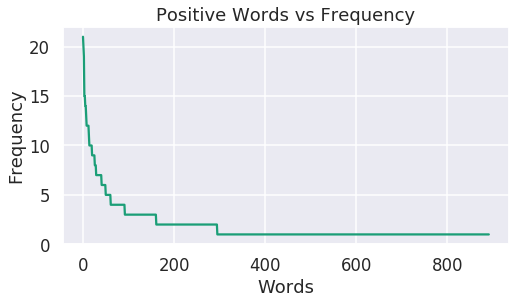

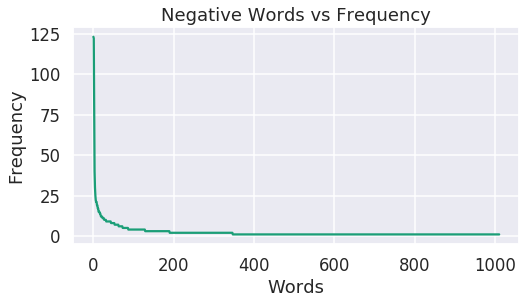

In [48]:
#Plotting the frequencies of most common positive and negative words

pos_y = [x[1] for x in positive_freq.most_common()]
plt.figure(figsize=(8,4))
plt.plot(pos_y)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Positive Words vs Frequency')
plt.show()

neg_y = [x[1] for x in negative_freq.most_common()]
plt.figure(figsize=(8,4))
plt.plot(neg_y)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Negative Words vs Frequency')
plt.show()